<a href="https://colab.research.google.com/github/BenJavaCode/Neural-networks/blob/main/First_(_Linear_regression_implementation_)_from_scratch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# For showing how to implement basic neural network from scratch.
# And for showing how the same network is implemented with Pytorch.

In [202]:
%matplotlib inline
import random
import torch

In [203]:
"""
The true parameters generating our dataset will be  w=[2,−3.4]⊤  and  b=4.2 , and our synthetic labels will be assigned according to the following linear model with the noise term  ϵ :
y=Xw+b+ϵ.

"""

'\nThe true parameters generating our dataset will be  w=[2,−3.4]⊤  and  b=4.2 , and our synthetic labels will be assigned according to the following linear model with the noise term  ϵ :\ny=Xw+b+ϵ.\n\n'

In [204]:
def synthetic_data(w, b, num_examples):  
    """Generate y = Xw + b + noise."""
    X = torch.normal(0, 1, (num_examples, len(w))) # Mean, std, shape
    y = torch.matmul(X, w) + b # Matrix multiplication and ad constant. Xw+b
    #y += torch.normal(0, 0.01, y.shape) # ad ϵ.
    return X, y.reshape((-1, 1))

true_w = torch.tensor([2, -3.4])
true_b = 4.2
features, labels = synthetic_data(true_w, true_b, 1000)

In [205]:
print('features:', features[0], '\nlabel:', labels[0])

features: tensor([ 0.1380, -0.4015]) 
label: tensor([5.8410])


In [206]:
from matplotlib import pyplot as plt

In [207]:
#By generating a scatter plot using the second feature features[:, 1] and labels, 
#we can clearly observe the linear correlation between the two.
#The reason, the linear relationship is clear, is because, the variable [1] -3.4 has a bigger impact than [0] 2
#This is because 3.4 is bigger than 2, and therefore has a bigger impact on matrix mul.

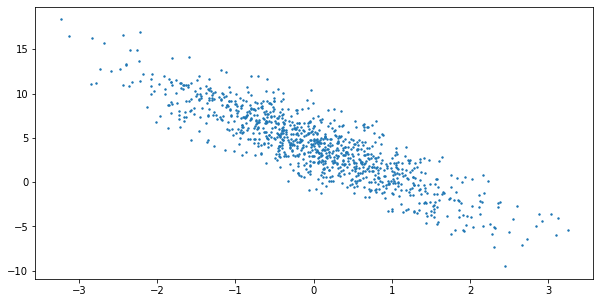

In [208]:
plt.figure(figsize=(10, 5))

plt.scatter(features[:, 1].detach().numpy(),
            labels.detach().numpy(), 2) # x, y, dotsize


In [209]:
# Funtion for iterating through data in batches.
# batch_size is size, features is a matrix, labesls is a vector.
# yields minibatches of label n features as tuples, of size batch_size

def data_iter(batch_size, features, labels):
    num_examples = len(features)
    indices = list(range(num_examples))

    random.shuffle(indices)
    for i in range(0, num_examples, batch_size):
        batch_indices = torch.tensor(indices[i:min(i + batch_size, num_examples)])
        yield features[batch_indices], labels[batch_indices]

In [210]:
# Initializing parameters
w = torch.normal(0, 0.01, size=(2, 1), requires_grad=True) # weights of network is 2,1 because, there is 1 layer with 2 input features
b = torch.zeros(1, requires_grad=True) # Bias of 0

In [211]:
# Linear regrassion model
def linreg(X, w, b):
  return torch.matmul(X,w) + b

In [212]:
# Squared loss function
def squared_loss(y_hat, y): # y_hat is the pred, and y is the true label
    return (y_hat - y.reshape(y_hat.shape))**2 / 2

In [213]:
# Minibacth stochastic gradient descent 
# Updates the parameters, with the gradient of the loss, computed with respect to the parameters
"""
The size of the update step is determined by the learning rate lr. 
Because our loss is calculated as a sum over the minibatch of examples,
 we normalize our step size by the batch size (batch_size), 
 so that the magnitude of a typical step size does not depend heavily on our choice of the batch size.
"""
def sgd(params, lr, batch_size):  
    with torch.no_grad():
        for param in params:
            param -= lr * param.grad / batch_size  # When the gradient of the param is negative, it is moved positively, and vise versa
            param.grad.zero_()

In [214]:
lr = 0.03
num_epochs = 3
net = linreg
loss = squared_loss
batch_size = 10

for epoch in range(num_epochs):
    for X, y in data_iter(batch_size, features, labels):
        l = loss(net(X, w, b), y)  # Minibatch loss in `X` and `y`
        # Compute gradient on `l` with respect to [`w`, `b`]
        l.sum().backward()
        sgd([w, b], lr, batch_size)  # Update parameters using their gradient
    with torch.no_grad(): # Not computing gradients
        train_l = loss(net(features, w, b), labels) # Loss on whole d_set for stats
        print(f'epoch {epoch + 1}, loss {float(train_l.mean()):f}')

epoch 1, loss 0.035164
epoch 2, loss 0.000076
epoch 3, loss 0.000000


In [215]:
print(f'error in estimating w: {true_w - w.reshape(true_w.shape)}')
print(f'error in estimating b: {true_b - b}')


error in estimating w: tensor([ 0.0002, -0.0002], grad_fn=<SubBackward0>)
error in estimating b: tensor([0.0005], grad_fn=<RsubBackward1>)


In [216]:
b

tensor([4.1995], requires_grad=True)

# Concise implementation

In [217]:
from torch.utils import data

In [218]:
def load_array(data_arrays, batch_size, is_train=True): 
    " Data Iterator in pytorch "
    dataset = data.TensorDataset(*data_arrays) # Dataset of the class TensorDataset. Is a Dataset wrapping tensors. params = *Tensors
    return data.DataLoader(dataset, batch_size, shuffle=is_train) # An iterator, for iterating a dataset/datasets

batch_size = 10
data_iter = load_array((features, labels), batch_size)

In [219]:
next(iter(data_iter))

[tensor([[ 0.7125, -0.6161],
         [-0.0552,  0.2314],
         [ 0.7635, -0.5829],
         [-0.9219, -0.5423],
         [ 1.2006, -0.9893],
         [ 0.4010, -0.4772],
         [ 1.0852,  0.3288],
         [-0.4478,  0.8342],
         [-0.3435,  0.5182],
         [-1.2042,  1.4965]]), tensor([[ 7.7197],
         [ 3.3027],
         [ 7.7089],
         [ 4.2000],
         [ 9.9647],
         [ 6.6245],
         [ 5.2525],
         [ 0.4681],
         [ 1.7510],
         [-3.2964]])]

In [220]:
from torch import nn
# Linear reg network
net = nn.Sequential(nn.Linear(2, 1))

In [221]:
# Changing weights and bias of first layer in network
net[0].weight.data.normal_(0, 0.01)
net[0].bias.data.fill_(0)

tensor([0.])

In [222]:
loss = nn.MSELoss() # Mean squared loss, that returns average loss over examples

In [223]:
trainer = torch.optim.SGD(net.parameters(), lr=0.03) # Minibacth stochastic gradient descent, needs only networks params, and a learning rate.

In [224]:
# Training loops are fundamentially, basicly always the same,
# GAN networks and adversarial networks are one exception, to this.
num_epochs = 3
for epoch in range(num_epochs):
    for X, y in data_iter:
        l = loss(net(X), y)
        trainer.zero_grad()
        l.backward()
        trainer.step()
    l = loss(net(features), labels)
    print(f'epoch {epoch + 1}, loss {l:f}')

epoch 1, loss 0.000121
epoch 2, loss 0.000000
epoch 3, loss 0.000000


In [225]:
w = net[0].weight.data
print('error in estimating w:', true_w - w.reshape(true_w.shape))
b = net[0].bias.data
print('error in estimating b:', true_b - b)

error in estimating w: tensor([ 2.3842e-07, -2.3842e-07])
error in estimating b: tensor([2.8610e-06])


In [226]:
# acces gradient of layer weigths:
net[0].weight.grad

tensor([[-2.8982e-08,  2.9855e-06]])